In [2]:
import pandas as pd

import warnings

In [3]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [37]:
ams_list = pd.read_csv('ams_list_june.csv')

In [38]:
ams_reviews = pd.read_csv('ams_rev_jun.csv')

In [39]:
ams_reviews['date'] = pd.to_datetime(ams_reviews['date'])

In [1]:
most_recent_date = ams_reviews['date'].max()

print("The most recent date is:", most_recent_date.date())

NameError: name 'ams_reviews' is not defined

In [41]:
merged_df_ams = pd.merge(ams_reviews, ams_list, left_on = 'listing_id' , right_on = 'id' , how='inner')

In [42]:
merged_df_ams = merged_df_ams.drop(['neighborhood_overview','host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate','host_neighbourhood','neighbourhood','bathrooms','host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','has_availability','license','host_about','id_x','reviewer_name','id_y','listing_url', 'scrape_id'	,'last_scraped',	'source' , 'picture_url','host_thumbnail_url', 'host_picture_url' ,'host_listings_count', 'host_verifications' , 'neighbourhood_cleansed' ,'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights'	,'maximum_maximum_nights'	,'minimum_nights_avg_ntm'	,'maximum_nights_avg_ntm',	'availability_30'	,'availability_60'	,'availability_90' ,'calendar_last_scraped','number_of_reviews_ltm'	, 'number_of_reviews_l30d' ,'calculated_host_listings_count'	,'calculated_host_listings_count_entire_homes'	,'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms','host_name', 'reviews_per_month' ,'review_scores_checkin' , 'review_scores_accuracy'], axis = 1)

In [43]:
merged_df_ams = merged_df_ams.dropna()

In [44]:
merged_df_ams.shape

(326969, 35)

In [45]:
merged_df_ams['first_review'] = pd.to_datetime(merged_df_ams['first_review'])
merged_df_ams['last_review'] = pd.to_datetime(merged_df_ams['last_review'])
merged_df_ams['review_duration_years'] = ((merged_df_ams['last_review'] - merged_df_ams['first_review']).dt.days / 365).astype(int)
merged_df_ams = merged_df_ams.drop(['last_review','first_review','host_url'], axis = 1)

In [46]:
merged_df_ams['location'] = 'Amsterdam'

In [47]:
merged_df_ams.shape

(326969, 34)

In [48]:
from googletrans import Translator

translator = Translator()

def translate_to_english(text):
    
    try:
        translation = translator.translate(text, dest='en')
        
        return translation.text
    
    except Exception as e:
        
        return text  

merged_df_ams['translated_comments'] = merged_df_ams['comments'].apply(lambda x: translate_to_english(str(x)))

print(merged_df_ams[['comments', 'translated_comments']].head())


KeyboardInterrupt



In [49]:
merged_df_ams.to_csv('preprocessed_data_amsterdam.csv', index = False)

In [60]:
df_list = pd.read_csv('hague_list.csv')

In [61]:
df_rev = pd.read_csv('hague_rev.csv')

In [62]:
df_rev['date'] = pd.to_datetime(df_rev['date'])

In [63]:
merged_df = pd.merge(df_rev, df_list, left_on = 'listing_id' , right_on = 'id' , how='inner')

In [64]:
merged_df = merged_df.drop(['neighborhood_overview','host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate','host_neighbourhood','neighbourhood','bathrooms','host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','has_availability','license','host_about','id_x','reviewer_name','id_y','listing_url', 'scrape_id'	,'last_scraped',	'source' , 'picture_url','host_thumbnail_url', 'host_picture_url' ,'host_listings_count', 'host_verifications' , 'neighbourhood_cleansed' ,'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights'	,'maximum_maximum_nights'	,'minimum_nights_avg_ntm'	,'maximum_nights_avg_ntm',	'availability_30'	,'availability_60'	,'availability_90' ,'calendar_last_scraped','number_of_reviews_ltm'	, 'number_of_reviews_l30d' ,'calculated_host_listings_count'	,'calculated_host_listings_count_entire_homes'	,'calculated_host_listings_count_private_rooms',	'calculated_host_listings_count_shared_rooms','host_name','reviews_per_month' ,'review_scores_checkin' , 'review_scores_accuracy'], axis = 1)

In [65]:
merged_df['first_review'] = pd.to_datetime(merged_df['first_review'])

merged_df['last_review'] = pd.to_datetime(merged_df['last_review'])

merged_df['review_duration_years'] = ((merged_df['last_review'] - merged_df['first_review']).dt.days / 365).astype(int)

merged_df = merged_df.drop(['last_review','first_review','host_url'], axis = 1)

In [66]:
merged_df['location'] = 'the Hague'

In [67]:
merged_df = merged_df.dropna()

In [68]:
merged_df.shape

(42770, 34)

In [69]:
merged_df.to_csv('preprocessed_data_hague.csv', index= False)

In [70]:
df1 = pd.read_csv('preprocessed_data_amsterdam.csv')

df2 = pd.read_csv('preprocessed_data_rot.csv')

df3 = pd.read_csv('preprocessed_data_hague.csv')

In [71]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

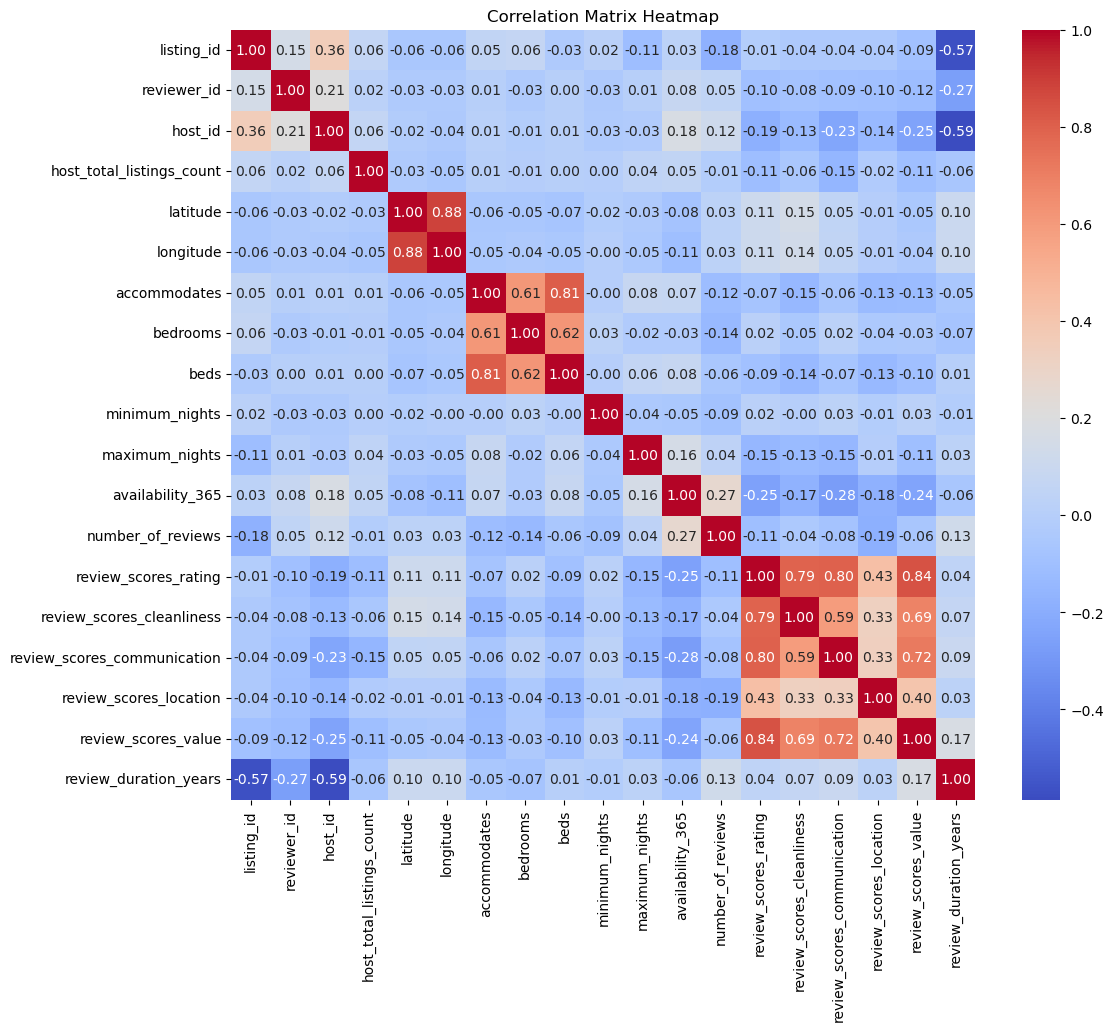

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numerical_columns = combined_df.select_dtypes(include='number').columns

numerical_df = combined_df[numerical_columns]

corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [74]:
combined_df.describe()

,listing_id,reviewer_id,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,review_duration_years
count,4.130890e+05,4.130890e+05,4.130890e+05,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000,413089.000000
mean,7.954739e+16,1.591785e+08,9.375100e+07,5.353345,52.291196,4.785009,2.757740,1.193777,1.729293,2.528305,516.809431,154.883267,343.276354,4.792197,4.776331,4.883795,4.798806,4.648151,6.068075
std,2.415642e+17,1.529924e+08,1.290072e+08,31.756847,0.154666,0.212341,1.594159,0.803529,1.870235,5.912982,505.931273,113.491844,456.912415,0.159899,0.195336,0.124098,0.176337,0.173817,3.100997
min,2.818000e+03,1.000000e+00,3.159000e+03,1.000000,51.867390,4.117920,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.068622e+06,3.377935e+07,7.679262e+06,1.000000,52.343079,4.834410,2.000000,1.000000,1.000000,1.000000,30.000000,48.000000,100.000000,4.710000,4.690000,4.830000,4.710000,4.550000,4.000000
50%,1.862251e+07,1.048463e+08,3.136565e+07,2.000000,52.363380,4.884300,2.000000,1.000000,1.000000,2.000000,365.000000,147.000000,245.000000,4.830000,4.830000,4.930000,4.850000,4.680000,6.000000
75%,3.637799e+07,2.440439e+08,1.324836e+08,4.000000,52.374290,4.901050,4.000000,1.000000,2.000000,3.000000,1125.000000,252.000000,445.000000,4.910000,4.920000,4.970000,4.930000,4.770000,8.000000
max,1.173898e+18,5.832590e+08,5.785674e+08,1717.000000,52.425120,5.026669,16.000000,23.000000,46.000000,365.000000,1125.000000,365.000000,3935.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000


In [75]:
df = combined_df

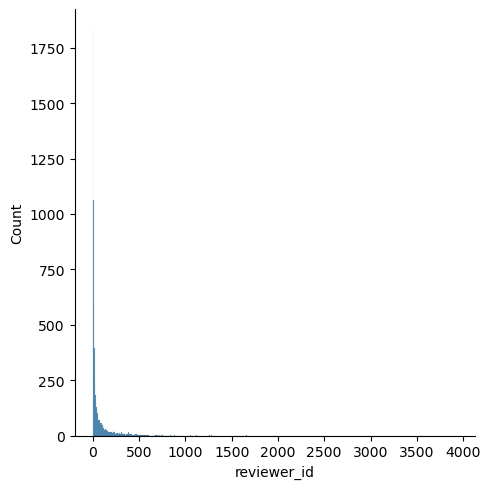

In [99]:
import seaborn as sns

count_ratings_df = df[['reviewer_id','listing_id']].groupby(['listing_id']).count()
sns.displot(data=count_ratings_df, x='reviewer_id', binwidth=5)

In [76]:
from ftfy import fix_text

from bs4 import BeautifulSoup

def clean_comment(text):
    
    if pd.isnull(text):
        
        return text 
    try:
        
        text_fixed = fix_text(text)
        
    except Exception:
        
        text_fixed = text  
        
    text_fixed = text_fixed.replace('<br/>', '\n')
    
    soup = BeautifulSoup(text_fixed, "html.parser")
    
    text_clean = soup.get_text()
    
    text_clean = text_clean.strip()
    
    return text_clean

df['comments'] = df['comments'].apply(clean_comment)

In [77]:
stop_words = [
    
    'the', 'is', 'in', 'and', 'to', 'a', 'of', 'it', 'we', 'was', 'for',
    'but', 'on', 'with', 'as', 'you', 'at', 'this', 'that', 'had',
    'our', 'be', 'by', 'or', 'an', 'are', 'from', 'so', 'if', 'have',
    'my', 'they', 'which', 'one', 'their', 'there', 'what', 'more',
    'when', 'can', 'your', 'will', 'would', 'should', 'could', 'about',
    'out', 'up', 'them', 'some', 'me', 'just', 'into', 'has',
    'also', 'very', 'been', 'did', 'do', 'he', 'she', 'his', 'her', 'how',
    'then', 'than', 'other', 'over', 'because', 'any', 'only', 'were',
    'after', 'did', 'these', 'who', 'its', 'see', 'well', 'here',
    'get', 'got', 'even', 'make', 'made', 'us', 'you', 'your', 'yours',
    'I', 'am', 'he', 'she', 'it', 'we', 'they', 'you', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'myself', 'ourselves',
    'yourself', 'yourselves', 'himself', 'herself', 'itself', 'themselves',
    'each', 'few', 'many', 'some', 'such', 'very',
    's', 't', 'can', 'will', 'don', 'should', 'now'
    
]

In [78]:
def remove_stop_words(text, stop_words):
    
    if pd.isnull(text):
        
        return text  

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]

    filtered_text = ' '.join(filtered_words)

    return filtered_text


In [79]:
df['comments'] = df['comments'].apply(lambda x: remove_stop_words(x, stop_words))

In [80]:
df['description'] = df['description'].apply(lambda x: remove_stop_words(x, stop_words))

In [83]:
import re

def clean_text(text):
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

df['comments'] = df['comments'].apply(lambda x: clean_text(str(x)))

In [88]:
df.isnull().sum()

listing_id                     0
date                           0
reviewer_id                    0
comments                       0
name                           0
description                    0
host_id                        0
host_since                     0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_sco

In [89]:
df['comments'].head(100)

0     rented apartment visiting family found clean c...
1     sunbird apt described light spacious apartment...
2     i enjoyed time staying gisèle simons place i f...
3     home perfect husband i trip amsterdam gisèle s...
4     gisèle simon great hosts reached before arrive...
5     stay simon giseles apartment absolutely perfec...
6     i organized weekend friend 25 people perfect j...
7             great ship great comms highly recommended
8     perfect weekend jorns boat friends perfect tim...
9     fantastic time aboard chateauroux not meet jor...
10    nice stay skipper nextdoor available anytime h...
11    ten friends weekend good time boat beautiful c...
12    6 friends weekend nice stay amsterdam boat ski...
13    good stay petras boat little confusion finding...
14    great stay petras ship staying lovely boat rea...
15                                 great spot big group
16    petra été très arrangeante pour notre famille ...
17    sehr netter empfang durch die vermieter vö

In [95]:
import pandas as pd
from textblob import TextBlob

def get_sentiment(text):
    
    if isinstance(text, str): 
        
        analysis = TextBlob(text)
        
        return analysis.sentiment.polarity
    
    else:
        
        return None  

df['sentiment'] = df['comments'].apply(get_sentiment)

df['sentiment'].fillna(0, inplace=True)

In [6]:
df.isnull().sum()

listing_id                     0
date                           0
reviewer_id                    0
comments                       0
name                           0
description                    0
host_id                        0
host_since                     0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_sco

In [10]:
df.to_csv('sentiment.csv', index = False)

In [181]:
combined_df.to_csv('final_preprocessed_df.csv', index = False)